<a href="https://colab.research.google.com/github/gabyxsantos/Economia/blob/Modificacoes-gaby/atualizandoDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install "pandas>=2.0,<2.3" --upgrade
!pip install babypandas --no-deps
!pip install matplotlib


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
babypandas 0.1.9 requires pandas<=1.5.3,>=0.24, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [ ]:
import numpy as np
import babypandas as bpd
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/gabyxsantos/Economia/main/projecoes_2024_tab4_indicadores.xlsx"
dados = pd.read_excel(url)
dados = dados[(dados[dados.columns[0]].notna()) & (dados[dados.columns[1]].notna()) & (dados[dados.columns[2]].notna())]

#Retirando linhas nulas
for i in range(0, dados.shape[1]):
    dados.rename(columns={dados.columns[i]: dados.iloc[0, i]}, inplace=True)
dados = dados.reset_index(drop = True).drop(0)

dados

,ANO,CÓD.,SIGLA,LOCAL,POP_T,POP_H,POP_M,TCG_T,TCG_H,TCG_M,...,RDI60,RDT60,RDJ65,RDI65,RDT65,IE60,IE65,IE80,ID_M,ID_MED
1,2000,0,BR,Brasil,174695935,85720706,88975229,NaN,NaN,NaN,...,14.206208,62.953355,46.698707,9.407064,56.105772,29.142644,20.144164,3.888745,28.314517,25.286941
2,2001,0,BR,Brasil,177003743,86821427,90182316,1.321043,1.284078,1.356655,...,14.307632,61.839348,45.530672,9.495381,55.026053,30.101231,20.85491,4.035052,28.572942,25.595223
3,2002,0,BR,Brasil,179228254,87882321,91345933,1.256759,1.221926,1.290294,...,14.419914,60.766364,44.393946,9.599581,53.993527,31.113308,21.623625,4.205821,28.845196,25.923454
4,2003,0,BR,Brasil,181377654,88907299,92470355,1.199253,1.166307,1.230949,...,14.550357,59.763442,43.304364,9.714486,53.01885,32.181739,22.433041,4.396686,29.128255,26.278205
5,2004,0,BR,Brasil,183469593,89905311,93564282,1.153361,1.122531,1.183003,...,14.711434,58.851646,42.26421,9.836084,52.100294,33.328869,23.272845,4.606715,29.420245,26.650273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,2066,53,DF,Distrito Federal,2833335,1349784,1483551,-0.768785,-0.712703,-0.819755,...,78.880664,101.272634,19.581355,56.427767,76.009122,352.272107,288.170893,110.644515,49.393802,52.236564
2340,2067,53,DF,Distrito Federal,2810837,1339890,1470947,-0.794047,-0.733006,-0.849583,...,80.019301,102.432573,19.588116,57.328164,76.916279,357.017496,292.668091,113.348328,49.557541,52.511818
2341,2068,53,DF,Distrito Federal,2787832,1329808,1458024,-0.818439,-0.75245,-0.87855,...,81.100627,103.550669,19.610389,58.193637,77.804026,361.249333,296.749015,115.608373,49.708977,52.782436
2342,2069,53,DF,Distrito Federal,2764372,1319558,1444814,-0.841514,-0.770788,-0.906021,...,82.166193,104.675965,19.651429,59.034309,78.685738,365.024554,300.407211,117.42424,49.84825,53.040354


In [ ]:
#Renomeando colunas
dados=dados.rename(columns={'RS': 'RAZAO_SEXO', 'ID_M': 'MED_IDADE', 'ID_MED': 'MEDN_IDADE', 'TBN' : 'TXB_NATALID',
                      'TBM' :'TXB_MORTALID', 'TCV': 'TX_CRESC_VEGET', 'IE60' : 'INDC_60+', 'IE65' : 'INDC_65+',
                      'IE80' : 'INDC_80+', 'RDJ60': 'RZ_DPND_J60', 'RDI60' : 'RZ_DPND_I60' , 'RDT60' : 'RZ_DPND_60_T',
                      'RDJ65': 'RZ_DPND_J65', 'RDI65' : 'RZ_DPND_I6+', 'RDT65' : 'RZ_DPND_T65','TFT' : 'TX_FCUND_T',
                      'TEF_10-14' : 'TX_FCUND_10E14', 'TEF_15-19': 'TX_FCUND_15E19', 'TEF_20-24' : 'TX_FCUND_20E24', 'TEF_25-29' : 'TX_FCUND_25E29',
                      'TEF_30-34' : 'TX_FCUND_30E34', 'TEF_35-39': 'TX_FCUND_35E39', 'TEF_40-44': 'TX_FCUND_40E44', 'TEF_45-49': 'TX_FCUND_45E49',
                      'TEF_50+': 'TX_FCUND_50+'})

col = ['TCG_','e0_', 'e60_', '5q0_', '45q15_', '20q60_', 'TMI_']
col_nova = ['TX_CRES_GEOM_','ESP_VIDA_O_' , 'ESP_VIDA_6O_' , 'PROB_MORTE_OE5_' , 'PROB_MORTE_15E45_', 'PROB_MORTE_60E80_', 'TX_MORT_INFANTIL_']

for i in range(0, dados.shape[1]):
    nome_col = str(dados.columns[i])

    for j in range(0,7):
        if(col[j] in nome_col):
         nome_col = nome_col.replace(col[j], col_nova[j])

    if(nome_col != str(dados.columns[i])):
        dados = dados.rename(columns= {str(dados.columns[i]):nome_col})

dados.columns

Index(['ANO', 'CÓD.', 'SIGLA', 'LOCAL', 'POP_T', 'POP_H', 'POP_M',
       'TX_CRES_GEOM_T', 'TX_CRES_GEOM_H', 'TX_CRES_GEOM_M', 'RAZAO_SEXO',
       'NASC_T', 'NASC_H', 'NASC_M', 'OBT_T', 'OBT_H', 'OBT_M', 'TXB_NATALID',
       'TXB_MORTALID', 'TX_CRESC_VEGET', 'ESP_VIDA_O_T', 'ESP_VIDA_O_H',
       'ESP_VIDA_O_M', 'ESP_VIDA_6O_T', 'ESP_VIDA_6O_H', 'ESP_VIDA_6O_M',
       'TX_MORT_INFANTIL_T', 'TX_MORT_INFANTIL_H', 'TX_MORT_INFANTIL_M',
       'PROB_MORTE_OE5_T', 'PROB_MORTE_OE5_H', 'PROB_MORTE_OE5_M',
       'PROB_MORTE_15E45_T', 'PROB_MORTE_15E45_H', 'PROB_MORTE_15E45_M',
       'PROB_MORTE_60E80_T', 'PROB_MORTE_60E80_H', 'PROB_MORTE_60E80_M',
       'TX_FCUND_T', 'TX_FCUND_10E14', 'TX_FCUND_15E19', 'TX_FCUND_20E24',
       'TX_FCUND_25E29', 'TX_FCUND_30E34', 'TX_FCUND_35E39', 'TX_FCUND_40E44',
       'TX_FCUND_45E49', 'TX_FCUND_50+', 'RZ_DPND_J60', 'RZ_DPND_I60',
       'RZ_DPND_60_T', 'RZ_DPND_J65', 'RZ_DPND_I6+', 'RZ_DPND_T65', 'INDC_60+',
       'INDC_65+', 'INDC_80+', 'MED_IDADE

In [ ]:
id_locais = dados.iloc[:, :4] #ANO, COD, SIGLA, LOCAL

#Recorte dos dados

#Indicadores gerais com recorte de gênero
# [POP_*, NASC_*, OBT_*, TX_CRES_VEGET_*, ESP_VIDA_O_*, ESP_VIDA_6O_*, PROB_MORTE_OE5_*, PROB_MORTE_15E45_*, PROB_MORTE_60E80_*, TX_MORT_INFANTIL_*]
indicadores_femininos = id_locais
indicadores_masculinos = id_locais

for i in range(0, dados.shape[1]):
    if('_M' == dados.columns[i][-2:]):
       indicadores_femininos = pd.concat([indicadores_femininos, dados.iloc[:, i]], axis=1)
    if('_H' == dados.columns[i][-2:]):
       indicadores_masculinos = pd.concat([indicadores_masculinos, dados.iloc[:, i]], axis=1)

In [ ]:
#Incidicadores gerais da população
#[POP_*, NASC_*, OBT_*, TX_CRESC_GEOM_*, RAZAO_SEXO, TX_CRESC_VEGETATIVO, TX_BRUTA_NATALIDADE, TX_BRUTA_MORTALIDADE, MEDIA_IDADE, MEDIANA_IDADE]
indices_populacionais = id_locais
indices_populacionais = pd.concat([indices_populacionais, dados.iloc[:, 4:20]], axis=1)
indices_populacionais = pd.concat([indices_populacionais, dados.iloc[:, 57:59]], axis=1)

#Estatísticas de mortalidade
# [ESP_VIDA_O_*, ESP_VIDA_6O_*, PROB_MORTE_OE5_*, PROB_MORTE_15E45_*, PROB_MORTE60E80_*, TX_OBITO_INFANTIL_*]
mortalidade_est = id_locais
mortalidade_est = pd.concat([mortalidade_est, dados.iloc[:, 20:37]], axis=1)

#Estatísticas fecundidade
#[TX_FCUND_T , TX_FCUND_10E14, TX_FCUND_15E19, TX_FCUND_20E24, TX_FCUND_25E29, TX_FCUND_30E34, TX_FCUND_35E39, TX_FCUND_40E44, TX_FCUND_45E49, TX_FCUND_50+]
fecundidade_est = id_locais
fecundidade_est = pd.concat([fecundidade_est, dados.iloc[:, 38:48]], axis=1)

#Indice de Envelhecimento
# [INDICE_60+, INDICE_65+, INDICE_80+]
envelhecimento = id_locais
envelhecimento = pd.concat([envelhecimento, dados.iloc[:, 54:57]], axis=1)

#Razao de dependencia
# [RZ_DEPEND_0E14_60, RZ_DEPEND_60+, RZ_DEPEND_TOTAL_0E60+, RZ_DEPEND_0E14_65,  RZ_DEPEND_65+,  RZ_DEPEND_TOTAL_65+]
razao_dependencia = id_locais
razao_dependencia = pd.concat([razao_dependencia, dados.iloc[:, 48:54]], axis=1)

# Como a taxa de natalidade está evoluindo ao longo dos anos?

In [ ]:
tx_natal = dados.groupby('ANO')['TXB_NATALID'].mean()
tx_natal

,TXB_NATALID
ANO,
2000,23.02877
2001,21.566824
2002,20.670142
2003,20.256845
2004,19.523479
...,...
2066,7.643979
2067,7.613907
2068,7.58927


<Axes: title={'center': 'Evolução da taxa de natalidade'}, xlabel='ANO', ylabel='Média em milhões'>

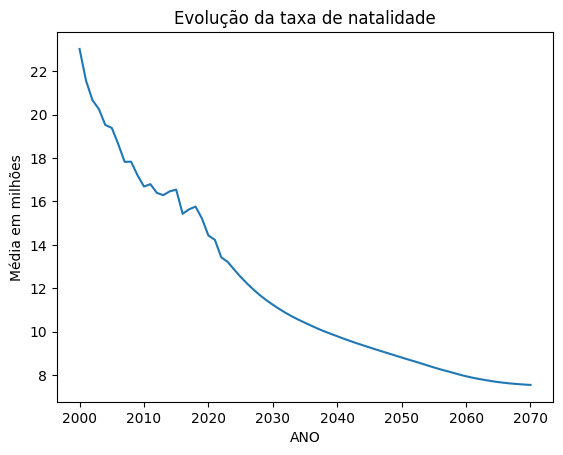

In [ ]:
tx_natal.plot(kind="line", ylabel='Média em milhões', title='Evolução da taxa de natalidade')

# Existe diferença entre a expectativa de vida dos homens e das mulheres?
## Houve algum periodo em que a expectavidade devida de ambos caiu drasticamente?

In [ ]:
# Agrupar por ano e tirar a média da expectativa de vida para cada grupo
media_fem = indicadores_femininos.groupby('ANO')['ESP_VIDA_O_M'].mean()
media_masc = indicadores_masculinos.groupby('ANO')['ESP_VIDA_O_H'].mean()

# Calcular a diferença
diferenca = media_fem - media_masc

In [ ]:
diferenca

,0
ANO,
2000,7.14244
2001,7.182417
2002,7.253937
2003,7.272207
2004,7.251254
...,...
2066,4.662932
2067,4.610104
2068,4.557368


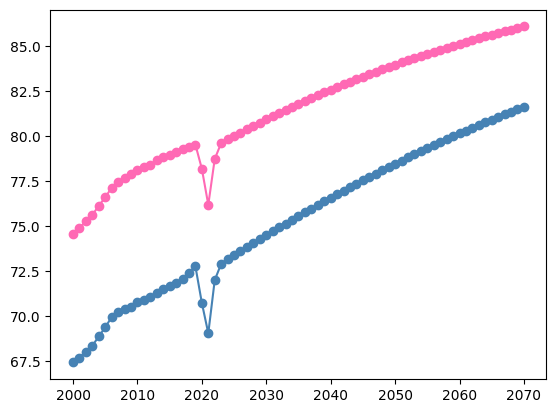

In [ ]:
plt.plot(media_fem.index, media_fem.values, label='Mulheres', color='hotpink', marker='o')
plt.plot(media_masc.index, media_masc.values, label='Homens', color='steelblue', marker='o')

 # Como a taxa de fecundidade varia por Estado no Brasil?
 ## Quais são os Estados com menor e maior taxa de fecundidade?

In [ ]:
tx_fecundidade=fecundidade_est.groupby('LOCAL')['TX_FCUND_T'].mean()

In [ ]:
tx_fecundidade=tx_fecundidade.sort_values(ascending=True)
tx_fecundidade = tx_fecundidade.drop('Brasil')
tx_fecundidade

,TX_FCUND_T
LOCAL,
Rio de Janeiro,1.494884
Rio Grande do Sul,1.517749
Minas Gerais,1.518225
Sudeste,1.520893
São Paulo,1.523664
...,...
Mato Grosso,1.824021
Amazonas,1.89301
Amapá,1.913258


<Axes: title={'center': 'Taxa de fecundidade por Estado no Brasil'}, xlabel='Taxa de fecundidade', ylabel='Estado'>

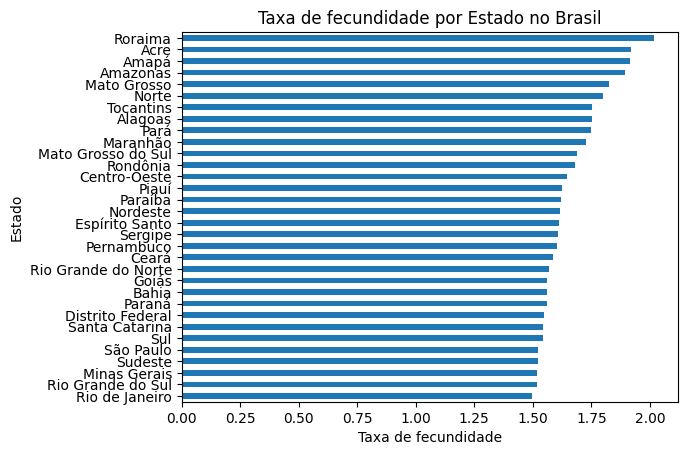

In [ ]:
tx_fecundidade.plot(kind='barh', title='Taxa de fecundidade por Estado no Brasil', ylabel='Estado', xlabel='Taxa de fecundidade')

In [ ]:
tx_media_brasil=fecundidade_est.get('TX_FCUND_T').mean()
print("A taxa de fecundidade total média no Brasil é de", tx_media_brasil);

A taxa de fecundidade total média no Brasil é de 1.6569936712686568


In [ ]:
min_valor = tx_fecundidade.min()  # menor valor da taxa
estado_min = tx_fecundidade[tx_fecundidade == min_valor]  # linha(s) correspondente(s)
estado_min

,TX_FCUND_T
LOCAL,
Rio de Janeiro,1.494884


In [ ]:
max_valor = tx_fecundidade.max()  # menor valor da taxa
estado_max = tx_fecundidade[tx_fecundidade == max_valor]  # linha(s) correspondente(s)
estado_max

,TX_FCUND_T
LOCAL,
Roraima,2.017738


# Existe correlação entre taxa de crescimento vegetativo e expectativa de vida?

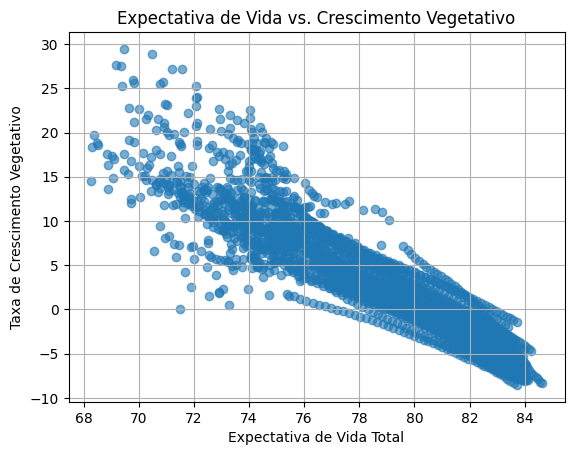

In [ ]:
plt.scatter(dados['ESP_VIDA_O_T'], dados['TX_CRESC_VEGET'], alpha=0.6)
plt.title('Expectativa de Vida vs. Crescimento Vegetativo')
plt.xlabel('Expectativa de Vida Total')
plt.ylabel('Taxa de Crescimento Vegetativo')
plt.grid(True)
plt.show()

# Qual a média de idade total e por Estado no Brasil?

In [ ]:
med_idade_total=dados.get('MED_IDADE').mean()
print("A média de idade total no Brasil é de", med_idade_total, "anos")

A média de idade total no Brasil é de 38.17821934097961 anos


In [ ]:
med_idade_estado=dados.groupby('LOCAL')['MED_IDADE'].mean()
med_idade_estado=med_idade_estado.drop('Brasil')
print(med_idade_estado)

LOCAL
Acre         35.105303
Alagoas      37.760402
Amapá        34.756839
Amazonas     34.562056
Bahia        39.523262
               ...    
Sergipe      38.593939
Sudeste      40.304998
Sul          39.914806
São Paulo    40.118168
Tocantins    37.173315
Name: MED_IDADE, Length: 32, dtype: object


In [ ]:
minimo_idade=med_idade_estado.min()
med_idade_estado[med_idade_estado==minimo_idade]

,MED_IDADE
LOCAL,
Roraima,33.390891


In [ ]:
maximo_idade=med_idade_estado.max()
med_idade_estado[med_idade_estado==maximo_idade]

,MED_IDADE
LOCAL,
Rio Grande do Sul,41.268029


# Como a taxa de mortalidade infantil total varia por Estado no Brasil?
## Quais são os Estados com menor e maior taxa de mortalidade infantil total?

In [ ]:
mortalidade_estado=dados.groupby('LOCAL')['TX_MORT_INFANTIL_T'].mean()
mortalidade_estado=mortalidade_estado.drop('Brasil')
mortalidade_estado=mortalidade_estado.sort_values(ascending=True)
print(mortalidade_estado)

LOCAL
Santa Catarina        8.221329
Rio Grande do Sul     8.602553
Sul                   8.759336
Distrito Federal      9.154455
Paraná                9.279289
                       ...    
Acre                 14.469145
Amazonas             14.515834
Sergipe              15.361641
Roraima              15.630303
Amapá                15.862313
Name: TX_MORT_INFANTIL_T, Length: 32, dtype: object


<Axes: title={'center': 'Taxa de mortalidade infantil por Estado no Brasil'}, xlabel='Taxa de mortalidade em milhões', ylabel='Estado'>

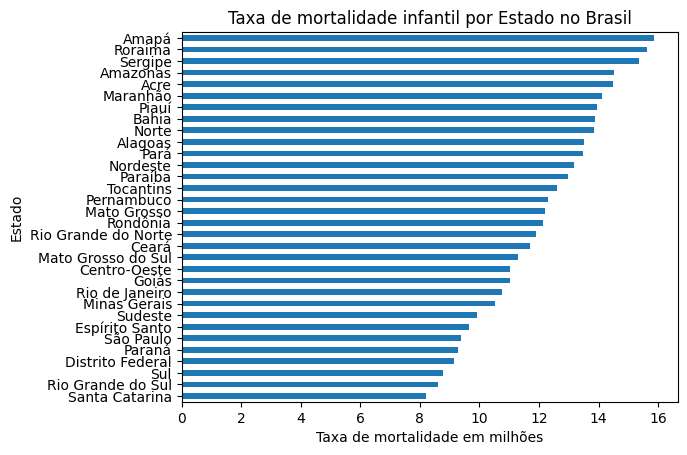

In [ ]:
mortalidade_estado.plot(kind='barh', title='Taxa de mortalidade infantil por Estado no Brasil', xlabel='Taxa de mortalidade em milhões',
                        ylabel='Estado')